# Basic Neural Networks Notebook

To learn the theory we'll first try to create a simple network with 3 layers to learn to approximate matrix determinants. 

## matrix determinants

In [133]:
using LinearAlgebra
"""
Network structure. 

    sizes::Array{Int64, 1}
    weights_hidden::Array{Float64,2}
    weights_output::Array{Float64,2}
    biases_hidden::Array{Float64,1}
    biases_output::Array{Float64,1} 
"""
struct Network_struct1
    sizes::Array{Int64, 1} # size of each layer
    # randomised default values
    weights_hidden::Array{Float64,2}
    weights_output::Array{Float64,2}
    biases_hidden::Array{Float64,1} 
    biases_output::Array{Float64,1} 
end


"""
convert an int in (0-9) to Array{Float64,1} eg.

    4 -> [0,0,0,0,4,0,0,0,0,0]

Not used for matrix determinant example
"""
function binary_rep(target::Int64)
    rep = zeros(10)
    rep[target+1]=1.0
    return rep
end


"""
sigmoid function for each "neuron"
"""
function sigmoid(z::Float64)
    return 1/(1+exp(-z))
end


"""
evaluate output of a given network configuration. Arguments:

    self::Network_struct
    input_data::Array{Float64,1}
    target::Int64
"""
function evaluate(self::Network_struct1, input_data::Array{Float64,1}, target::Float64)
    hidden_layer = []
    network_output = []
    #evaluate the hidden layer
    for i in 1:self.sizes[2]
        push!(hidden_layer, sigmoid(dot(self.weights_hidden[i,:],input_data)+self.biases_hidden[i]))
    end
    for i in 1:self.sizes[3]
        push!(network_output, sigmoid(dot(self.weights_output[i,:],hidden_layer)+self.biases_output[i]))
    end
    # pass forward to output layer
    return network_output # Usually you would divide by the number of input alues/target labels here and not the size of the output layer.
end 
"""
evaluate cost of a given output 
    self::Network_struct
    Array{Float64,1}::network_output
    Float64::target
"""
function cost(self::Network_struct1, network_output::Array{Any,1}, target::Float64)
    return (1/self.sizes[3]) * sum(abs2.(network_output .- binary_rep(target))) 
end
"""
Function to update weights and biases by gradient descent. Arguments:
    
    self::Network_struct
    learning_rate::Float64
    step_size::Float64
    parameter_space_size::Int64
    input_data::Array{Float64,1}
    tolerance::Float64
    target::Int64

"""
function train(self::Network_struct1, learning_rate::Float64, step_size::Float64, 
        parameter_space_size::Int64, input_data::Array{Float64,1}, tolerance::Float64, target::Float64)
    
    network_output = evaluate(self, input_data, target)
    C_0 = cost(self, network_output, target)
    print("\n\ntraining...\n")
    flush(stdout)
    iter = 0
    while C_0 > tolerance && iter < 250000
        network_output = evaluate(self, input_data, target)
        C_0 = cost(self, network_output, target)
        
        w2_0 = self.weights_hidden; w3_0 = self.weights_output
        b2_0 = self.biases_hidden; b3_0 = self.biases_output
        
        # arrays to hold gradients.
        gw2 = []; gw3 = []
        gb2 = []; gb3 = []
        
        for i in 1:length(self.weights_hidden)

            update_set = copy(w2_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, update_set, self.weights_output, 
                self.biases_hidden, self.biases_output)

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gw2, derivative)
            #self.weights_hidden[i] = self.weights_hidden[i] - learning_rate*derivative
            
        end
        
        for i in 1:length(self.biases_hidden)

            update_set = copy(b2_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, self.weights_output,
                update_set, self.biases_output )

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gb2, derivative)
            #self.biases_hidden[i] = self.biases_hidden[i] - learning_rate*derivative
        end
        
        for i in 1:length(self.weights_output)

            update_set = copy(w3_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, update_set,
                self.biases_hidden, self.biases_output )

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gw3, derivative)
            #self.weights_output[i] = self.weights_output[i] - learning_rate*derivative
        end
        
        for i in 1:length(self.biases_output)
            update_set = copy(b3_0)
            update_set[i] += step_size
            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, self.weights_output,
                self.biases_hidden, update_set)
            
            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gb3, derivative)
            #self.biases_output[i] = self.biases_output[i] - learning_rate*derivative
        end
        
        # Update the weights
        for (i, gi) in enumerate(gw2) self.weights_hidden[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gb2) self.biases_hidden[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gw3) self.weights_output[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gb3) self.biases_output[i] -= learning_rate*gi end
        
        network_output = evaluate(self, input_data, target)
        C_0 = cost(self, network_output, target)
        flush(stdout)
        iter = iter + 1
    end
end

train

### train the network on some random matrices

In [77]:
# random matrix to test network
matrix_rand = 10 .* rand(2,2)
network_size = [length(matrix_rand),5,1]

hidden_weight = rand(network_size[2]+network_size[3],network_size[1])
output_weight = rand(network_size[3], network_size[2])
hidden_biases = rand(network_size[2])
output_biases = rand(network_size[3])

network = 
Network_struct1(network_size, hidden_weight, output_weight, hidden_biases, output_biases)

parameter_space_size =  length(network.weights_hidden)+
      length(network.weights_output)+
      length(network.biases_hidden)+
      length(network.biases_hidden)

learning_rate = 0.9; step_size = 0.0001; tolerance = 0.0001;

true_res = []
estim_res = []
err = []

for i in 1:250
    # random matrix
    matrix_rand = rand(2,2)#[0.0 2.0 ; 0.0 4.0]
    # target result
    target = det(matrix_rand)

    # train network on sample data
    train(network, learning_rate, step_size, parameter_space_size, 
        vcat(matrix_rand...), tolerance, target)


    print("\n \n Determinant (true result) =$(target)")
    print("\nDeterminant (estimate) : $(evaluate(network, vcat(matrix_rand...), target)[1])")
    print("\nerror : $(evaluate(network, vcat(matrix_rand...), target)[1] - target)")
    push!(true_res, target)
    push!(estim_res, evaluate(network, vcat(matrix_rand...), target)[1])
    push!(err, evaluate(network, vcat(matrix_rand...), target)[1] - target)
    flush(stdout)
end



training...

 
 Determinant (true result) =0.05701186903939091
Determinant (estimate) : 0.06682935228276746
error : 0.00981748324337655

training...

 
 Determinant (true result) =0.3971707946660952
Determinant (estimate) : 0.39116816821893724
error : -0.006002626447157933

training...

 
 Determinant (true result) =-0.33275388842821496
Determinant (estimate) : 1.2290695228775397e-6
error : 0.33275511749773784

training...

 
 Determinant (true result) =0.21965729026961606
Determinant (estimate) : 2.1627064378834884e-6
error : -0.21965512756317818

training...

 
 Determinant (true result) =0.13613511328274522
Determinant (estimate) : 0.12686388964882683
error : -0.009271223633918385

training...

 
 Determinant (true result) =-0.03376563006349547
Determinant (estimate) : 1.2220221447855995e-5
error : 0.033777850284943324

training...

 
 Determinant (true result) =0.09811865631050101
Determinant (estimate) : 0.08825999774072435
error : -0.009858658569776663

training...

 
 Determin

error : 0.005266705528626847

training...

 
 Determinant (true result) =-0.13348119968266822
Determinant (estimate) : 1.3109825764757339e-6
error : 0.1334825106652447

training...

 
 Determinant (true result) =-0.020675450225355524
Determinant (estimate) : 1.5442853818365007e-6
error : 0.02067699451073736

training...

 
 Determinant (true result) =0.4706614874234368
Determinant (estimate) : 0.463633969531518
error : -0.0070275178919188

training...

 
 Determinant (true result) =0.40506067486845443
Determinant (estimate) : 0.40019677631942885
error : -0.00486389854902558

training...

 
 Determinant (true result) =0.24976124591383383
Determinant (estimate) : 0.2587039911848379
error : 0.008942745271004054

training...

 
 Determinant (true result) =-0.09325634871463111
Determinant (estimate) : 1.9259109629328097e-6
error : 0.09325827462559404

training...

 
 Determinant (true result) =-0.47690749089408313
Determinant (estimate) : 1.8535583606187165e-7
error : 0.4769076762499192

tr

error : 0.2248620225751118

training...

 
 Determinant (true result) =0.030830943184034124
Determinant (estimate) : 5.969431257192092e-8
error : -0.03083088348972155

training...

 
 Determinant (true result) =-0.1298666545715317
Determinant (estimate) : 2.9816020005295604e-8
error : 0.12986668438755172

training...

 
 Determinant (true result) =-0.4084903322198565
Determinant (estimate) : 2.0487611525575344e-8
error : 0.40849035270746803

training...

 
 Determinant (true result) =-0.2264929612194966
Determinant (estimate) : 5.823636170007709e-10
error : 0.22649296180186024

training...

 
 Determinant (true result) =-0.11553701217248363
Determinant (estimate) : 1.0813553303329198e-8
error : 0.11553702298603694

training...

 
 Determinant (true result) =0.25119241280615845
Determinant (estimate) : 0.24323822372475964
error : -0.007954189081398805

training...

 
 Determinant (true result) =-0.27231676032773755
Determinant (estimate) : 2.4830970410071374e-8
error : 0.272316785158707

error : 0.009112356086159012

training...

 
 Determinant (true result) =0.09775406364941347
Determinant (estimate) : 0.08856331585259505
error : -0.009190747796818416

training...

 
 Determinant (true result) =-0.08885527697356173
Determinant (estimate) : 1.0531528008338108e-6
error : 0.08885633012636256

training...

 
 Determinant (true result) =-0.0530772634479711
Determinant (estimate) : 2.0818521921864944e-7
error : 0.053077471633190314

training...

 
 Determinant (true result) =-0.3353314538424965
Determinant (estimate) : 5.9282838491631095e-8
error : 0.335331513125335

training...

 
 Determinant (true result) =0.12305092470769509
Determinant (estimate) : 0.1132813798931662
error : -0.009769544814528894

training...

 
 Determinant (true result) =0.4809324490757646
Determinant (estimate) : 0.49010719983428097
error : 0.00917475075851637

training...

 
 Determinant (true result) =0.5146174217992734
Determinant (estimate) : 0.5063234340328545
error : -0.008293987766418875

tra

error : 0.036835003137418984

training...

 
 Determinant (true result) =0.09448845669867127
Determinant (estimate) : 0.08490150090107056
error : -0.009586955797600716

training...

 
 Determinant (true result) =-0.14225520114097454
Determinant (estimate) : 5.762651078116018e-7
error : 0.14225577740608233

training...

 
 Determinant (true result) =-0.6168210783691717
Determinant (estimate) : 5.519746984059323e-11
error : 0.6168210784243692

training...

 
 Determinant (true result) =0.4275858927727792
Determinant (estimate) : 0.43516764338623637
error : 0.007581750613457172

training...

 
 Determinant (true result) =0.30893781808445686
Determinant (estimate) : 0.31775147094814304
error : 0.008813652863686183

training...

 
 Determinant (true result) =-0.3034960739514663
Determinant (estimate) : 4.184273193903477e-11
error : 0.3034960739933091

training...

 
 Determinant (true result) =-0.22139714121363885
Determinant (estimate) : 2.003939000672966e-9
error : 0.22139714321757784

tr

Seems this network can pretty well predict the determinant if it is positive. Negative det matrices throw it off for some reason. Probably a bug in here somewhere.

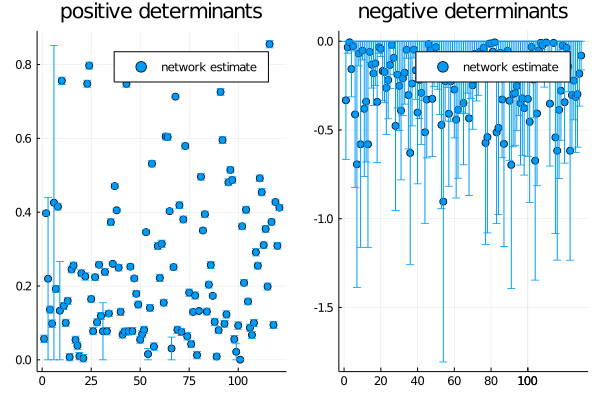

In [85]:
using Plots

p1 = plot(true_res[true_res.>0.0 ], yerror=err[true_res.>0.0 ], seriestype = :scatter, label = "network estimate"
          ,title = "positive determinants")
p2 = plot(true_res[true_res.<0.0 ], yerror=err[true_res.<0.0 ], seriestype = :scatter, label = "network estimate"
          ,title = "negative determinants")

plot(p1, p2, layout = @layout([A B]))

### testing on more data

In [90]:
test_x = []
test_y = []
test_err = []
for i in 1:2500
    # random matrix
    matrix_rand = rand(2,2)#[0.0 2.0 ; 0.0 4.0]
    # target result
    target = det(matrix_rand)

    print("\n \n Determinant (true result) =$(target)")
    print("\nDeterminant (estimate) : $(evaluate(network, vcat(matrix_rand...), target)[1])")
    print("\nerror : $(evaluate(network, vcat(matrix_rand...), target)[1] - target)")
    push!(test_y, target)
    push!(test_x, evaluate(network, vcat(matrix_rand...), target)[1])
    push!(test_err, evaluate(network, vcat(matrix_rand...), target)[1] - target)
    flush(stdout)
end


 
 Determinant (true result) =-0.04728563528032018
Determinant (estimate) : 7.84478534206396e-6
error : 0.047293480065662245
 
 Determinant (true result) =0.19969399602945934
Determinant (estimate) : 0.10241070247436083
error : -0.0972832935550985
 
 Determinant (true result) =0.3784032757762955
Determinant (estimate) : 0.23966105004194604
error : -0.13874222573434947
 
 Determinant (true result) =0.18569570548534522
Determinant (estimate) : 0.4361563844491761
error : 0.25046067896383084
 
 Determinant (true result) =0.51420306670707
Determinant (estimate) : 0.645515088200881
error : 0.13131202149381105
 
 Determinant (true result) =-0.12618458942815933
Determinant (estimate) : 1.527791964449189e-7
error : 0.12618474220735576
 
 Determinant (true result) =-0.08215944007108705
Determinant (estimate) : 1.1762948500111898e-6
error : 0.08216061636593706
 
 Determinant (true result) =0.2809522244380522
Determinant (estimate) : 0.22489215376401075
error : -0.05606007067404142
 
 Determinant

error : 0.14123124632581113
 
 Determinant (true result) =-0.2717446669103226
Determinant (estimate) : 6.105420639106924e-7
error : 0.2717452774523865
 
 Determinant (true result) =0.27515807939909703
Determinant (estimate) : 0.1544351450822987
error : -0.12072293431679834
 
 Determinant (true result) =-0.27747797783995737
Determinant (estimate) : 1.2065732233265815e-9
error : 0.2774779790465306
 
 Determinant (true result) =-0.1478422853153728
Determinant (estimate) : 4.95623805029403e-10
error : 0.1478422858109966
 
 Determinant (true result) =0.645752946840464
Determinant (estimate) : 0.5409689433011606
error : -0.1047840035393034
 
 Determinant (true result) =-0.0308963339234956
Determinant (estimate) : 4.957771976139138e-7
error : 0.030896829700693216
 
 Determinant (true result) =-0.059863780897102786
Determinant (estimate) : 3.322238215124904e-8
error : 0.05986381411948494
 
 Determinant (true result) =0.23991911614877987
Determinant (estimate) : 0.527246969603156
error : 0.2873

error : 0.0634527150841685
 
 Determinant (true result) =0.0422536677890731
Determinant (estimate) : 0.0034505976886481803
error : -0.03880307010042492
 
 Determinant (true result) =0.0698663102822491
Determinant (estimate) : 0.06758098415063271
error : -0.0022853261316163886
 
 Determinant (true result) =-0.3806898708642117
Determinant (estimate) : 1.4376857752961208e-8
error : 0.38068988524106945
 
 Determinant (true result) =-0.13647744593732133
Determinant (estimate) : 4.553451768818899e-9
error : 0.13647745049077312
 
 Determinant (true result) =-0.7626071670442197
Determinant (estimate) : 1.0110648763926567e-10
error : 0.7626071671453262
 
 Determinant (true result) =0.46686563292467165
Determinant (estimate) : 0.46686479101268175
error : -8.419119899016891e-7
 
 Determinant (true result) =0.2474820031461892
Determinant (estimate) : 0.09929261417362263
error : -0.14818938897256656
 
 Determinant (true result) =-0.4258788382742732
Determinant (estimate) : 4.1683097598418714e-10
er

error : -0.026838984522887688
 
 Determinant (true result) =0.22816263258474234
Determinant (estimate) : 0.21441368042362396
error : -0.013748952161118377
 
 Determinant (true result) =0.5163609749389989
Determinant (estimate) : 0.4263005562092747
error : -0.0900604187297242
 
 Determinant (true result) =0.024749995667770582
Determinant (estimate) : 0.0035437003292229374
error : -0.021206295338547645
 
 Determinant (true result) =-0.031789718945862855
Determinant (estimate) : 7.038598814558982e-8
error : 0.031789789331851004
 
 Determinant (true result) =-0.46230190301142365
Determinant (estimate) : 6.421876281779921e-9
error : 0.46230190943329996
 
 Determinant (true result) =-0.1012941584998873
Determinant (estimate) : 4.928128504404402e-6
error : 0.1012990866283917
 
 Determinant (true result) =-0.19080567939322285
Determinant (estimate) : 6.125311695608651e-7
error : 0.1908062919243924
 
 Determinant (true result) =-0.4300626353480653
Determinant (estimate) : 4.256634491876102e-9
e

error : 0.2974913776711303
 
 Determinant (true result) =-0.22585955997308416
Determinant (estimate) : 4.597728106098915e-8
error : 0.22585960595036522
 
 Determinant (true result) =0.07362506425921
Determinant (estimate) : 0.0005038067825616352
error : -0.07312125747664837
 
 Determinant (true result) =-0.3811854711319866
Determinant (estimate) : 3.2703969085264976e-8
error : 0.3811855038359557
 
 Determinant (true result) =-0.5533425478123298
Determinant (estimate) : 1.9382467262497816e-9
error : 0.5533425497505765
 
 Determinant (true result) =0.46335100864852896
Determinant (estimate) : 0.7100523731944492
error : 0.2467013645459203
 
 Determinant (true result) =0.14909323729471566
Determinant (estimate) : 0.016519253132551467
error : -0.1325739841621642
 
 Determinant (true result) =-0.2573127023332716
Determinant (estimate) : 1.697805694369166e-7
error : 0.257312872113841
 
 Determinant (true result) =0.013763984211476541
Determinant (estimate) : 0.00046187148748364697
error : -0.

error : 0.10291606658479624
 
 Determinant (true result) =0.0631968821887683
Determinant (estimate) : 1.1608285194157103e-5
error : -0.06318527390357415
 
 Determinant (true result) =0.12013006278870336
Determinant (estimate) : 0.36700676162273527
error : 0.2468766988340319
 
 Determinant (true result) =0.43589947399660783
Determinant (estimate) : 0.8024373752795502
error : 0.36653790128294234
 
 Determinant (true result) =-0.4587301460292558
Determinant (estimate) : 2.9768609843315034e-9
error : 0.4587301490061168
 
 Determinant (true result) =0.4829601959872191
Determinant (estimate) : 0.7994209647676077
error : 0.3164607687803886
 
 Determinant (true result) =-0.0701419047270729
Determinant (estimate) : 1.4016398977244676e-9
error : 0.07014190612871281
 
 Determinant (true result) =0.10033632626104522
Determinant (estimate) : 2.4028751946203227e-7
error : -0.10033608597352575
 
 Determinant (true result) =0.19843519190945907
Determinant (estimate) : 0.2808744784309433
error : 0.0824

error : 0.49578572270784954
 
 Determinant (true result) =-0.25874282319360903
Determinant (estimate) : 4.354463675613718e-6
error : 0.25874717765728467
 
 Determinant (true result) =0.5132346193425907
Determinant (estimate) : 0.7281486601446737
error : 0.21491404080208298
 
 Determinant (true result) =0.05059742982739915
Determinant (estimate) : 0.003686910570211931
error : -0.04691051925718722
 
 Determinant (true result) =0.22199879463524913
Determinant (estimate) : 0.24964090391885926
error : 0.027642109283610133
 
 Determinant (true result) =-0.042183045965614424
Determinant (estimate) : 0.00045569133046480384
error : 0.04263873729607923
 
 Determinant (true result) =-0.07845556157028828
Determinant (estimate) : 7.498065793703353e-5
error : 0.07853054222822532
 
 Determinant (true result) =-0.10416793912536976
Determinant (estimate) : 4.73477694864126e-7
error : 0.10416841260306463
 
 Determinant (true result) =0.3137530151273259
Determinant (estimate) : 0.2644033105950771
error :

error : -0.007320205635311409
 
 Determinant (true result) =0.504522030974535
Determinant (estimate) : 0.5414234546590196
error : 0.03690142368448468
 
 Determinant (true result) =-0.3240649927761097
Determinant (estimate) : 1.6044692285151197e-7
error : 0.32406515322303253
 
 Determinant (true result) =-0.05590548630832692
Determinant (estimate) : 3.1729008192186554e-5
error : 0.0559372153165191
 
 Determinant (true result) =-0.023768663770831106
Determinant (estimate) : 2.2247975015037145e-5
error : 0.023790911745846143
 
 Determinant (true result) =-0.1613838337201781
Determinant (estimate) : 4.099147772095035e-6
error : 0.1613879328679502
 
 Determinant (true result) =0.2980545251871865
Determinant (estimate) : 0.4359236790274754
error : 0.13786915384028892
 
 Determinant (true result) =-0.4392850490551574
Determinant (estimate) : 2.381375716793349e-10
error : 0.439285049293295
 
 Determinant (true result) =0.002860260807312046
Determinant (estimate) : 0.0005573646766192243
error :

error : -0.21811697184652304
 
 Determinant (true result) =-0.6014631257833517
Determinant (estimate) : 6.100095667534542e-10
error : 0.6014631263933613
 
 Determinant (true result) =0.041694624845026534
Determinant (estimate) : 0.006136459315639006
error : -0.03555816552938753
 
 Determinant (true result) =0.4642480954046634
Determinant (estimate) : 0.6675176772869044
error : 0.20326958188224098
 
 Determinant (true result) =0.45070001667910836
Determinant (estimate) : 0.5309443717385536
error : 0.08024435505944522
 
 Determinant (true result) =0.05952693073504802
Determinant (estimate) : 0.10172268070029872
error : 0.042195749965250696
 
 Determinant (true result) =0.09783047524573132
Determinant (estimate) : 9.243002820077301e-5
error : -0.09773804521753054
 
 Determinant (true result) =-0.19804330676438792
Determinant (estimate) : 2.5583304131462203e-8
error : 0.19804333234769206
 
 Determinant (true result) =0.7266360491440332
Determinant (estimate) : 0.8355751933598515
error : 0.

error : 0.3211069469997321
 
 Determinant (true result) =-0.2236080751181704
Determinant (estimate) : 1.0615014104366338e-6
error : 0.22360913661958084
 
 Determinant (true result) =0.8525865418938412
Determinant (estimate) : 0.8117208844610707
error : -0.040865657432770486
 
 Determinant (true result) =0.27350434950102337
Determinant (estimate) : 0.5598504653121783
error : 0.28634611581115493
 
 Determinant (true result) =-0.36448477302260507
Determinant (estimate) : 8.674645368178684e-10
error : 0.3644847738900696
 
 Determinant (true result) =0.06168212491554173
Determinant (estimate) : 0.0019368516762096335
error : -0.0597452732393321
 
 Determinant (true result) =0.0993514081450385
Determinant (estimate) : 0.009194395948048495
error : -0.09015701219699
 
 Determinant (true result) =-0.22817841723808868
Determinant (estimate) : 1.3649542125306014e-7
error : 0.22817855373350993
 
 Determinant (true result) =-0.7136459368310788
Determinant (estimate) : 1.2850126605179918e-10
error : 

error : 0.7291318780688497
 
 Determinant (true result) =-0.15692632531657766
Determinant (estimate) : 2.729836933933059e-7
error : 0.15692659830027106
 
 Determinant (true result) =0.3816288480281227
Determinant (estimate) : 0.5134142249889455
error : 0.13178537696082282
 
 Determinant (true result) =-0.23748634778323516
Determinant (estimate) : 4.688553803713626e-8
error : 0.2374863946687732
 
 Determinant (true result) =0.16315754527713666
Determinant (estimate) : 0.0057882867213213205
error : -0.15736925855581535
 
 Determinant (true result) =0.25585705667281927
Determinant (estimate) : 0.29741220325138457
error : 0.041555146578565294
 
 Determinant (true result) =-0.17621697131403272
Determinant (estimate) : 2.164873705165449e-7
error : 0.17621718780140325
 
 Determinant (true result) =0.39068585383865856
Determinant (estimate) : 0.7424662416091019
error : 0.35178038777044335
 
 Determinant (true result) =-0.01910594521126025
Determinant (estimate) : 2.7101939297232046e-6
error : 

error : 0.6754865510503072
 
 Determinant (true result) =0.2518823587941588
Determinant (estimate) : 0.09474403966452181
error : -0.157138319129637
 
 Determinant (true result) =-0.17095408015688499
Determinant (estimate) : 1.563194026143323e-9
error : 0.170954081720079
 
 Determinant (true result) =-0.3554806856107995
Determinant (estimate) : 2.1094699749564486e-10
error : 0.35548068582174647
 
 Determinant (true result) =0.0965524285118825
Determinant (estimate) : 0.17976249126062172
error : 0.08321006274873921
 
 Determinant (true result) =0.015079179212694221
Determinant (estimate) : 0.00021680657134098873
error : -0.014862372641353233
 
 Determinant (true result) =0.04575137217564802
Determinant (estimate) : 0.0004994337947971428
error : -0.04525193838085088
 
 Determinant (true result) =0.3622355326897687
Determinant (estimate) : 0.670638027115808
error : 0.3084024944260393
 
 Determinant (true result) =0.45090227771365815
Determinant (estimate) : 0.6477343402077351
error : 0.196

error : 0.4151519981417279
 
 Determinant (true result) =-0.13513460265227725
Determinant (estimate) : 2.878578666237244e-7
error : 0.13513489051014388
 
 Determinant (true result) =-0.0607424725586939
Determinant (estimate) : 0.00039650952263575696
error : 0.06113898208132966
 
 Determinant (true result) =0.0029661389433639144
Determinant (estimate) : 0.00014607405739504932
error : -0.0028200648859688653
 
 Determinant (true result) =-0.1997137789958716
Determinant (estimate) : 2.938921905061845e-7
error : 0.1997140728880621
 
 Determinant (true result) =0.04975247663637256
Determinant (estimate) : 0.0013671573554475556
error : -0.04838531928092501
 
 Determinant (true result) =-0.0776795327797966
Determinant (estimate) : 1.0181498668265107e-5
error : 0.07768971427846487
 
 Determinant (true result) =-0.3381198375320595
Determinant (estimate) : 1.372930904426947e-10
error : 0.33811983766935255
 
 Determinant (true result) =-0.16259173530381135
Determinant (estimate) : 8.24491721973335

error : 0.27827549734079865
 
 Determinant (true result) =-0.1818845679400551
Determinant (estimate) : 1.249230783883986e-5
error : 0.18189706024789393
 
 Determinant (true result) =0.1095686690707006
Determinant (estimate) : 0.0003801299134598257
error : -0.10918853915724078
 
 Determinant (true result) =-0.2503520808042574
Determinant (estimate) : 2.6844700861657554e-10
error : 0.2503520810727044
 
 Determinant (true result) =-0.31860811692820146
Determinant (estimate) : 4.1658909232915634e-8
error : 0.31860815858711067
 
 Determinant (true result) =0.2124461331973935
Determinant (estimate) : 0.05883340748349866
error : -0.15361272571389484
 
 Determinant (true result) =0.2358482642641249
Determinant (estimate) : 0.4910667201087515
error : 0.25521845584462666
 
 Determinant (true result) =0.47416281904181334
Determinant (estimate) : 0.547507764786907
error : 0.07334494574509365
 
 Determinant (true result) =0.04799723675587516
Determinant (estimate) : 0.00011780650789772452
error : -

error : 0.1749256124173699
 
 Determinant (true result) =-0.10118938605007545
Determinant (estimate) : 2.487621438179058e-5
error : 0.10121426226445725
 
 Determinant (true result) =-0.3750389859770979
Determinant (estimate) : 7.34568608508163e-8
error : 0.37503905943395877
 
 Determinant (true result) =-0.05254711786457669
Determinant (estimate) : 1.2277285999169482e-8
error : 0.05254713014186269
 
 Determinant (true result) =0.011044990384088604
Determinant (estimate) : 1.671029893035601e-5
error : -0.011028280085158248
 
 Determinant (true result) =0.015561445063720227
Determinant (estimate) : 0.00016699621623462858
error : -0.015394448847485599
 
 Determinant (true result) =-0.8116478747202605
Determinant (estimate) : 6.960480807493677e-11
error : 0.8116478747898652
 
 Determinant (true result) =-0.4241713441669463
Determinant (estimate) : 1.2111323396167734e-9
error : 0.42417134537807866
 
 Determinant (true result) =0.3068911640242723
Determinant (estimate) : 0.12871444117681524


error : -0.0358672259157316
 
 Determinant (true result) =-0.2258434914920055
Determinant (estimate) : 6.605456483668927e-8
error : 0.22584355754657034
 
 Determinant (true result) =-0.5950037459272876
Determinant (estimate) : 4.947498142947733e-10
error : 0.5950037464220373
 
 Determinant (true result) =-0.24591080641404212
Determinant (estimate) : 7.664485476816135e-7
error : 0.2459115728625898
 
 Determinant (true result) =0.0573592198420775
Determinant (estimate) : 1.3598257264819387e-5
error : -0.057345621584812684
 
 Determinant (true result) =0.07240649030097039
Determinant (estimate) : 1.714114394925261e-5
error : -0.07238934915702114
 
 Determinant (true result) =0.011648693076241714
Determinant (estimate) : 0.31661078945091875
error : 0.304962096374677
 
 Determinant (true result) =-0.001575376780321024
Determinant (estimate) : 0.002767471116811989
error : 0.004342847897133013
 
 Determinant (true result) =-0.04978716667472982
Determinant (estimate) : 1.2842732884863301e-5
er

error : 0.3630214595419145
 
 Determinant (true result) =0.08812113162497633
Determinant (estimate) : 0.10766769615254147
error : 0.019546564527565147
 
 Determinant (true result) =-0.3487549323805975
Determinant (estimate) : 2.3610874638578144e-10
error : 0.34875493261670626
 
 Determinant (true result) =0.10335576313150757
Determinant (estimate) : 0.14076004576702048
error : 0.0374042826355129
 
 Determinant (true result) =-0.30384373484557997
Determinant (estimate) : 8.536557138855831e-10
error : 0.3038437356992357
 
 Determinant (true result) =-0.141477412469108
Determinant (estimate) : 5.4175260786368915e-8
error : 0.14147746664436878
 
 Determinant (true result) =0.022228466838275424
Determinant (estimate) : 1.3457569878657278e-5
error : -0.022215009268396767
 
 Determinant (true result) =0.6663230663985272
Determinant (estimate) : 0.7627514021421838
error : 0.09642833574365661
 
 Determinant (true result) =0.03034444593306743
Determinant (estimate) : 0.0037772635647516455
error 

error : 0.09541170990290823
 
 Determinant (true result) =-0.1951923257211734
Determinant (estimate) : 5.749713447319801e-10
error : 0.19519232629614475
 
 Determinant (true result) =0.18098545040159483
Determinant (estimate) : 0.011558486651228706
error : -0.16942696375036612
 
 Determinant (true result) =0.2659902730677443
Determinant (estimate) : 0.6314776813543109
error : 0.3654874082865666
 
 Determinant (true result) =-0.20097450052173557
Determinant (estimate) : 2.165503749579444e-9
error : 0.20097450268723932
 
 Determinant (true result) =-0.07968689960543461
Determinant (estimate) : 5.205425820176754e-6
error : 0.07969210503125479
 
 Determinant (true result) =0.10703358667119332
Determinant (estimate) : 0.01720783064170229
error : -0.08982575602949103
 
 Determinant (true result) =-0.1117163718004382
Determinant (estimate) : 8.571999411649513e-7
error : 0.11171722900037936
 
 Determinant (true result) =0.0919610982063825
Determinant (estimate) : 0.0006325714359280768
error : 

error : 0.07962977429310393
 
 Determinant (true result) =0.4659828797685978
Determinant (estimate) : 0.539711830457896
error : 0.07372895068929813
 
 Determinant (true result) =0.09962066232650689
Determinant (estimate) : 0.0018845222815160017
error : -0.09773614004499089
 
 Determinant (true result) =-0.5480084826520998
Determinant (estimate) : 6.742373992368959e-11
error : 0.5480084827195235
 
 Determinant (true result) =0.4855662358727849
Determinant (estimate) : 0.7967585096669695
error : 0.31119227379418457
 
 Determinant (true result) =0.43651017524961977
Determinant (estimate) : 0.23232212228393342
error : -0.20418805296568635
 
 Determinant (true result) =-0.12068184769499059
Determinant (estimate) : 2.3291010432096348e-8
error : 0.12068187098600101
 
 Determinant (true result) =-0.060439967555408744
Determinant (estimate) : 5.486049030782694e-5
error : 0.06049482804571657
 
 Determinant (true result) =0.06691083051020426
Determinant (estimate) : 0.0009867522573839167
error : 

error : 0.1737250967014709
 
 Determinant (true result) =-0.03868070163876514
Determinant (estimate) : 0.00023188406267954189
error : 0.03891258570144469
 
 Determinant (true result) =-0.31588413429632967
Determinant (estimate) : 1.322392052491374e-9
error : 0.3158841356187217
 
 Determinant (true result) =-0.15629963478587405
Determinant (estimate) : 7.01955060245706e-7
error : 0.1563003367409343
 
 Determinant (true result) =-0.09670262297422758
Determinant (estimate) : 2.0313502964795596e-8
error : 0.09670264328773054
 
 Determinant (true result) =-0.28694935494379487
Determinant (estimate) : 2.503048157486556e-10
error : 0.2869493551940997
 
 Determinant (true result) =0.04792449963535417
Determinant (estimate) : 8.816800388065856e-5
error : -0.04783633163147351
 
 Determinant (true result) =0.15281847149459257
Determinant (estimate) : 0.0013883408270101239
error : -0.15143013066758246
 
 Determinant (true result) =-0.2108377980988199
Determinant (estimate) : 6.645305601505777e-6
e

error : 0.32600380394617734
 
 Determinant (true result) =0.38771538125114435
Determinant (estimate) : 0.5980557889201963
error : 0.21034040766905193
 
 Determinant (true result) =-0.29386698142281814
Determinant (estimate) : 7.841808066207716e-11
error : 0.29386698150123625
 
 Determinant (true result) =0.06022625077187774
Determinant (estimate) : 0.2040998639773307
error : 0.14387361320545297
 
 Determinant (true result) =-0.3718608305592854
Determinant (estimate) : 3.301248878804218e-10
error : 0.3718608308894103
 
 Determinant (true result) =-0.1729012594061844
Determinant (estimate) : 1.621938715201152e-8
error : 0.17290127562557153
 
 Determinant (true result) =0.23246190857927823
Determinant (estimate) : 0.2833811832717909
error : 0.05091927469251267
 
 Determinant (true result) =-0.24067690648073886
Determinant (estimate) : 2.241069013875332e-9
error : 0.2406769087218079
 
 Determinant (true result) =-0.2596855204048672
Determinant (estimate) : 9.347019966091591e-11
error : 0.2

error : 0.1357113260420868
 
 Determinant (true result) =0.025322426038488555
Determinant (estimate) : 0.02506197181176007
error : -0.00026045422672848345
 
 Determinant (true result) =0.5540510342267474
Determinant (estimate) : 0.7462650635135931
error : 0.19221402928684572
 
 Determinant (true result) =0.22354360670139412
Determinant (estimate) : 0.16448575447862301
error : -0.0590578522227711
 
 Determinant (true result) =0.19405214023412495
Determinant (estimate) : 0.5209025261770595
error : 0.3268503859429345
 
 Determinant (true result) =-0.366590790807824
Determinant (estimate) : 6.19259732629184e-10
error : 0.36659079142708373
 
 Determinant (true result) =-0.21919244006637148
Determinant (estimate) : 1.2086928599040659e-9
error : 0.21919244127506435
 
 Determinant (true result) =0.19122517341301967
Determinant (estimate) : 0.37561712783624046
error : 0.1843919544232208
 
 Determinant (true result) =-0.020415603381596082
Determinant (estimate) : 0.00015184385519861264
error : 0

error : 0.27323117945644787
 
 Determinant (true result) =0.09039029768081193
Determinant (estimate) : 0.02300616961232838
error : -0.06738412806848355
 
 Determinant (true result) =-0.059932115542124687
Determinant (estimate) : 3.92317787252337e-6
error : 0.05993603871999721
 
 Determinant (true result) =0.26011194384315717
Determinant (estimate) : 0.012327090777648597
error : -0.24778485306550857
 
 Determinant (true result) =0.19742970321315795
Determinant (estimate) : 0.6460177296924627
error : 0.4485880264793048
 
 Determinant (true result) =0.0872159812456737
Determinant (estimate) : 0.35321258361952246
error : 0.26599660237384876
 
 Determinant (true result) =0.4226596539977795
Determinant (estimate) : 0.7503102100459664
error : 0.32765055604818694
 
 Determinant (true result) =-0.20434475810159122
Determinant (estimate) : 1.6531790891028033e-6
error : 0.20434641128068032
 
 Determinant (true result) =-0.22970196351395653
Determinant (estimate) : 9.884012021936932e-9
error : 0.2

error : 0.2777314934210562
 
 Determinant (true result) =0.5947602605414763
Determinant (estimate) : 0.6724324731942859
error : 0.07767221265280955
 
 Determinant (true result) =-0.0527063610917629
Determinant (estimate) : 5.809260060524355e-5
error : 0.052764453692368145
 
 Determinant (true result) =-0.004670442042235435
Determinant (estimate) : 0.0028540517984967347
error : 0.00752449384073217
 
 Determinant (true result) =0.3046611897701188
Determinant (estimate) : 0.40835949359058127
error : 0.10369830382046247
 
 Determinant (true result) =0.24797720893175076
Determinant (estimate) : 0.21485368433636728
error : -0.03312352459538348
 
 Determinant (true result) =0.24757890268744048
Determinant (estimate) : 0.12388801278590551
error : -0.12369088990153497
 
 Determinant (true result) =0.05211659185022546
Determinant (estimate) : 0.005901935792659332
error : -0.04621465605756613
 
 Determinant (true result) =0.1968507835585009
Determinant (estimate) : 0.02796637486348388
error : -0.

error : 0.1934210409519677
 
 Determinant (true result) =-0.3276221280241639
Determinant (estimate) : 1.7956137205303777e-9
error : 0.3276221298197776
 
 Determinant (true result) =0.2738273666466778
Determinant (estimate) : 0.10381626645803885
error : -0.17001110018863894
 
 Determinant (true result) =-0.164671389647831
Determinant (estimate) : 4.0496977117158756e-8
error : 0.16467143014480812
 
 Determinant (true result) =-0.6166196933640131
Determinant (estimate) : 3.760853922378965e-10
error : 0.6166196937400985
 
 Determinant (true result) =-0.1326685011036418
Determinant (estimate) : 4.487350055939446e-6
error : 0.13267298845369774
 
 Determinant (true result) =0.002189498992618802
Determinant (estimate) : 0.0005947880721786585
error : -0.0015947109204401434
 
 Determinant (true result) =0.18024116137647253
Determinant (estimate) : 0.23454021005695544
error : 0.05429904868048291
 
 Determinant (true result) =-0.2633612318696151
Determinant (estimate) : 1.2194162599126512e-9
error

error : 0.26392884727948085
 
 Determinant (true result) =0.1500887485626964
Determinant (estimate) : 0.02445728574651959
error : -0.12563146281617682
 
 Determinant (true result) =-0.07864834114520951
Determinant (estimate) : 0.00011172586009844168
error : 0.07876006700530795
 
 Determinant (true result) =-0.3081231821905649
Determinant (estimate) : 1.1472394623597105e-9
error : 0.30812318333780436
 
 Determinant (true result) =0.11163363662084458
Determinant (estimate) : 0.0766017471787663
error : -0.03503188944207827
 
 Determinant (true result) =-0.7579025781216923
Determinant (estimate) : 5.5342869143715615e-11
error : 0.7579025781770351
 
 Determinant (true result) =0.08343763803563047
Determinant (estimate) : 0.0007624061820823026
error : -0.08267523185354816
 
 Determinant (true result) =-0.01568351904980139
Determinant (estimate) : 3.2354341757725973e-7
error : 0.015683842593218967
 
 Determinant (true result) =-0.2974726581451452
Determinant (estimate) : 2.5367045827906627e-7

error : 0.10366699856510297
 
 Determinant (true result) =0.09139634569268687
Determinant (estimate) : 0.0037401066731974552
error : -0.08765623901948942
 
 Determinant (true result) =0.14057546694008932
Determinant (estimate) : 0.009908065931496582
error : -0.13066740100859275
 
 Determinant (true result) =0.1166421176483711
Determinant (estimate) : 0.019047674699267124
error : -0.09759444294910397
 
 Determinant (true result) =0.1707434670288309
Determinant (estimate) : 0.5528533121235917
error : 0.38210984509476076
 
 Determinant (true result) =0.1645964481840588
Determinant (estimate) : 0.3020858731619283
error : 0.1374894249778695
 
 Determinant (true result) =0.19488918755633916
Determinant (estimate) : 0.02840401174774639
error : -0.16648517580859276
 
 Determinant (true result) =0.22363158392738333
Determinant (estimate) : 0.09995828754204157
error : -0.12367329638534176
 
 Determinant (true result) =-0.2719806471915282
Determinant (estimate) : 8.4584280148225e-9
error : 0.2719

error : -0.13519003095945592
 
 Determinant (true result) =0.03104427713981046
Determinant (estimate) : 3.3940517611802245e-6
error : -0.03104088308804928
 
 Determinant (true result) =0.4315111530700325
Determinant (estimate) : 0.4225858395492426
error : -0.008925313520789901
 
 Determinant (true result) =-0.19447572868111213
Determinant (estimate) : 2.412174734210781e-10
error : 0.1944757289223296
 
 Determinant (true result) =0.00331700405537567
Determinant (estimate) : 1.0302643987035759e-7
error : -0.0033169010289357996
 
 Determinant (true result) =0.1688934587438002
Determinant (estimate) : 0.02419613877291167
error : -0.14469731997088853
 
 Determinant (true result) =-0.11277218897665242
Determinant (estimate) : 2.3808296108193105e-8
error : 0.11277221278494853
 
 Determinant (true result) =0.03947228938979585
Determinant (estimate) : 4.633674300094799e-6
error : -0.03946765571549576
 
 Determinant (true result) =0.2534320830204568
Determinant (estimate) : 0.15446282279155912
e

error : 0.34140305360349316
 
 Determinant (true result) =0.11625222130260161
Determinant (estimate) : 0.00022243931060898003
error : -0.11602978199199264
 
 Determinant (true result) =0.8839056916350422
Determinant (estimate) : 0.8333900476810683
error : -0.0505156439539739
 
 Determinant (true result) =-0.7822159584918896
Determinant (estimate) : 2.605929974459189e-10
error : 0.7822159587524826
 
 Determinant (true result) =0.030113147335357183
Determinant (estimate) : 0.17885761676474468
error : 0.1487444694293875
 
 Determinant (true result) =-0.09051105933457511
Determinant (estimate) : 8.98144206394536e-5
error : 0.09060087375521456
 
 Determinant (true result) =-0.21863706895105936
Determinant (estimate) : 2.0397853336106514e-9
error : 0.2186370709908447
 
 Determinant (true result) =-0.11097136208855958
Determinant (estimate) : 4.7707248519445836e-6
error : 0.11097613281341152
 
 Determinant (true result) =0.14851559463831382
Determinant (estimate) : 0.0001330601686884673
error

error : 0.15459622088828054
 
 Determinant (true result) =0.0005043042622765797
Determinant (estimate) : 7.308221625538096e-5
error : -0.0004312220460211988
 
 Determinant (true result) =0.08663701108475008
Determinant (estimate) : 0.054627793128177116
error : -0.032009217956572966
 
 Determinant (true result) =-0.03211510116057944
Determinant (estimate) : 3.791355930022706e-5
error : 0.03215301471987966
 
 Determinant (true result) =-0.23836990523330664
Determinant (estimate) : 1.9358257618407797e-9
error : 0.2383699071691324
 
 Determinant (true result) =-0.7475678938488187
Determinant (estimate) : 5.497621830257637e-11
error : 0.747567893903795
 
 Determinant (true result) =0.46887262380766537
Determinant (estimate) : 0.6241695530239605
error : 0.15529692921629512
 
 Determinant (true result) =-0.4856660488805723
Determinant (estimate) : 9.943375671365297e-10
error : 0.48566604987490986
 
 Determinant (true result) =-0.14301454067980873
Determinant (estimate) : 3.728719412744019e-5


error : 0.29529728101862596
 
 Determinant (true result) =0.18353410339787593
Determinant (estimate) : 0.166814803408271
error : -0.01671929998960492
 
 Determinant (true result) =-0.026228061172279937
Determinant (estimate) : 0.000645772155159079
error : 0.026873833327439017
 
 Determinant (true result) =0.22852030071277005
Determinant (estimate) : 0.06367574269717265
error : -0.1648445580155974
 
 Determinant (true result) =-0.003509265311261775
Determinant (estimate) : 7.650939637080425e-6
error : 0.0035169162508988557
 
 Determinant (true result) =-0.29773466684852495
Determinant (estimate) : 4.5467494678800967e-10
error : 0.2977346673031999
 
 Determinant (true result) =-0.005040520322094192
Determinant (estimate) : 0.0004135122406986543
error : 0.005454032562792846
 
 Determinant (true result) =-0.28482340067888684
Determinant (estimate) : 8.084474000262367e-10
error : 0.28482340148733426
 
 Determinant (true result) =0.09423801897851683
Determinant (estimate) : 0.001342722932470

error : 0.14654396386282656
 
 Determinant (true result) =0.01491855888165918
Determinant (estimate) : 0.001825789394902207
error : -0.013092769486756972
 
 Determinant (true result) =-0.03337402151248501
Determinant (estimate) : 5.386466417656962e-7
error : 0.03337456015912677
 
 Determinant (true result) =0.6805492466738736
Determinant (estimate) : 0.7381138189871659
error : 0.05756457231329226
 
 Determinant (true result) =-0.2148429122905311
Determinant (estimate) : 2.3294240859395959e-7
error : 0.21484314523293968
 
 Determinant (true result) =-0.3526961811434392
Determinant (estimate) : 2.3128128803072091e-10
error : 0.3526961813747205
 
 Determinant (true result) =-0.458866613909213
Determinant (estimate) : 8.840791634486703e-9
error : 0.45886662275000467
 
 Determinant (true result) =0.05449578637456971
Determinant (estimate) : 0.0014969373451669697
error : -0.052998849029402745
 
 Determinant (true result) =0.14901354177684714
Determinant (estimate) : 0.006446559033257203
erro

error : -0.01736707378280954
 
 Determinant (true result) =-0.22460956016536338
Determinant (estimate) : 1.5983385901941393e-8
error : 0.22460957614874927
 
 Determinant (true result) =0.06203869649188558
Determinant (estimate) : 0.5721337083827868
error : 0.5100950118909012
 
 Determinant (true result) =-0.06459162705478125
Determinant (estimate) : 3.4570812993498944e-6
error : 0.0645950841360806
 
 Determinant (true result) =-0.08033464506718
Determinant (estimate) : 3.684287666588975e-5
error : 0.08037148794384588
 
 Determinant (true result) =0.3841344726281516
Determinant (estimate) : 0.1239797310745072
error : -0.2601547415536444
 
 Determinant (true result) =-0.20193259498982083
Determinant (estimate) : 6.094903066764909e-8
error : 0.20193265593885149
 
 Determinant (true result) =-0.38523280338639243
Determinant (estimate) : 5.394337935756205e-8
error : 0.3852328573297718
 
 Determinant (true result) =-0.31422289531195696
Determinant (estimate) : 8.063754857259422e-9
error : 0.

error : 0.40037477200152044
 
 Determinant (true result) =0.43771660322266104
Determinant (estimate) : 0.3832959529180762
error : -0.05442065030458482
 
 Determinant (true result) =-0.508242450280833
Determinant (estimate) : 7.448769031584269e-9
error : 0.5082424577296021
 
 Determinant (true result) =0.08875440653431611
Determinant (estimate) : 0.005300699564599525
error : -0.08345370696971659
 
 Determinant (true result) =0.17527836733076793
Determinant (estimate) : 0.3272577825843717
error : 0.15197941525360378
 
 Determinant (true result) =-0.034746776445299186
Determinant (estimate) : 6.267653540130633e-6
error : 0.034753044098839316
 
 Determinant (true result) =-0.31047295999695007
Determinant (estimate) : 2.7866739676874722e-8
error : 0.31047298786368976
 
 Determinant (true result) =-0.47645946071154655
Determinant (estimate) : 5.3322927840387966e-9
error : 0.4764594660438393
 
 Determinant (true result) =0.015371782792812835
Determinant (estimate) : 5.1269160840224975e-6
erro

error : -0.02251989770773452
 
 Determinant (true result) =-0.638326952168898
Determinant (estimate) : 4.5738504535204026e-11
error : 0.6383269522146365
 
 Determinant (true result) =0.22944495224038366
Determinant (estimate) : 0.6413654185097603
error : 0.4119204662693766
 
 Determinant (true result) =0.1419980678924092
Determinant (estimate) : 0.03623258380795963
error : -0.10576548408444958
 
 Determinant (true result) =0.1307203764420229
Determinant (estimate) : 0.19300874650906466
error : 0.06228837006704177
 
 Determinant (true result) =-0.46330107765540873
Determinant (estimate) : 3.164311980680485e-10
error : 0.46330107797183995
 
 Determinant (true result) =0.016831766976916487
Determinant (estimate) : 2.0997769947513646e-5
error : -0.016810769206968973
 
 Determinant (true result) =0.3750719788079351
Determinant (estimate) : 0.6207779296142188
error : 0.24570595080628377
 
 Determinant (true result) =-0.0774260986838071
Determinant (estimate) : 8.479164766490061e-6
error : 0.

error : -0.10448076958805409
 
 Determinant (true result) =0.3126094547413535
Determinant (estimate) : 0.28624309782518514
error : -0.026366356916168343
 
 Determinant (true result) =-0.17839167927558672
Determinant (estimate) : 1.5448901530529622e-7
error : 0.17839183376460202
 
 Determinant (true result) =-0.011943679184884934
Determinant (estimate) : 4.2175201369552893e-10
error : 0.011943679606636948
 
 Determinant (true result) =0.4520091193904428
Determinant (estimate) : 0.3268125677757234
error : -0.12519655161471943
 
 Determinant (true result) =0.07825515274666439
Determinant (estimate) : 0.00774598444575525
error : -0.07050916830090914
 
 Determinant (true result) =0.2760702339324727
Determinant (estimate) : 0.33961065643206845
error : 0.06354042249959574
 
 Determinant (true result) =0.03846558799083641
Determinant (estimate) : 3.7670608953274824e-6
error : -0.03846182092994108
 
 Determinant (true result) =-0.503808042979366
Determinant (estimate) : 3.700555372667398e-10
er

error : -0.15994842630050196
 
 Determinant (true result) =0.08783540319612575
Determinant (estimate) : 0.001494805191603921
error : -0.08634059800452183
 
 Determinant (true result) =0.27953581158918567
Determinant (estimate) : 0.20039289390243353
error : -0.07914291768675213
 
 Determinant (true result) =0.29411891897650827
Determinant (estimate) : 0.17033025637401408
error : -0.12378866260249419
 
 Determinant (true result) =0.07297108131927625
Determinant (estimate) : 1.9771536832228185e-6
error : -0.07296910416559303
 
 Determinant (true result) =0.3968230160775327
Determinant (estimate) : 0.7416890515698471
error : 0.3448660354923144
 
 Determinant (true result) =0.1939831946021128
Determinant (estimate) : 0.07713768869691862
error : -0.11684550590519419
 
 Determinant (true result) =-0.18159775247307902
Determinant (estimate) : 2.1882444689176164e-7
error : 0.18159797129752592
 
 Determinant (true result) =0.370958569382853
Determinant (estimate) : 0.5078103866340221
error : 0.1

error : 0.01085698650525202
 
 Determinant (true result) =0.09229354016192999
Determinant (estimate) : 2.5459303600482846e-5
error : -0.09226808085832951
 
 Determinant (true result) =-0.013940226271806985
Determinant (estimate) : 0.00019830824348611526
error : 0.0141385345152931
 
 Determinant (true result) =-0.2760589620981354
Determinant (estimate) : 3.993135427471184e-9
error : 0.27605896609127084
 
 Determinant (true result) =0.2004017586291177
Determinant (estimate) : 0.3521567524610822
error : 0.1517549938319645
 
 Determinant (true result) =-0.36112152603087727
Determinant (estimate) : 1.7828089454582196e-7
error : 0.3611217043117718
 
 Determinant (true result) =0.27549056889426216
Determinant (estimate) : 0.5922506370967355
error : 0.3167600682024734
 
 Determinant (true result) =0.1479522188116812
Determinant (estimate) : 0.09461741289565231
error : -0.05333480591602888
 
 Determinant (true result) =-0.14736769479461026
Determinant (estimate) : 6.972337477325545e-5
error : 0

mean errors : 0.13250807346431961
mean errors of positive determinants : 0.011779506642865676
mean errors of negative determinants : 0.24757748871601798

__relative errors__
13147.750712843248

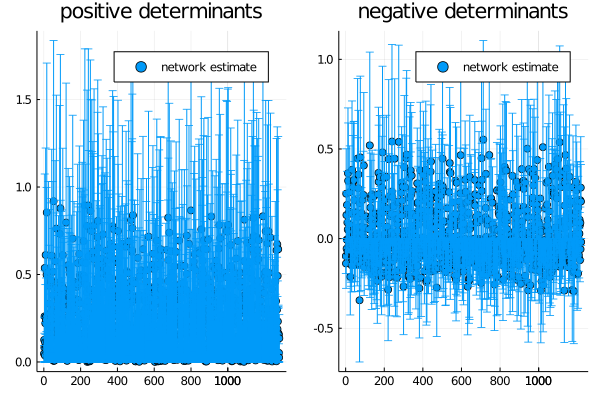

In [104]:
using Plots
using Statistics
p1 = plot(test_err[test_y.<0], yerror=test_err[test_y.<0], seriestype = :scatter, label = "network estimate"
          ,title = "positive determinants")
p2 = plot(test_err[test_y.>0], yerror=test_err[test_y.>0], seriestype = :scatter, label = "network estimate"
          ,title = "negative determinants")
print("mean errors : $(mean(test_err))\n")
print("mean errors of positive determinants : $(mean(test_err[test_y.>0]))\n")
print("mean errors of negative determinants : $(mean(test_err[test_y.<0]))\n")

print("\n__relative errors__\n")
print("$(mean((test_y[test_y.>0])./(test_x[test_y.>0])))")
plot(p1, p2, layout = @layout([A B]))


Impossible to see anything from this. Come back to this in a bit. 

## MNIST network

In [105]:
using Pkg
Pkg.add("MLDatasets")
using MLDatasets

training_x, training_y = MNIST.traindata()
test_x, test_y = MNIST.testdata()

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [======>                                  ]  

    Fetching: [================>

    Fetching: [

    Fetching: [===========================>             

    Fetching: [

Fetching: [========================================>]  99.9 % ]  95.5 %

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


(FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

FixedPointNumbers.Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N

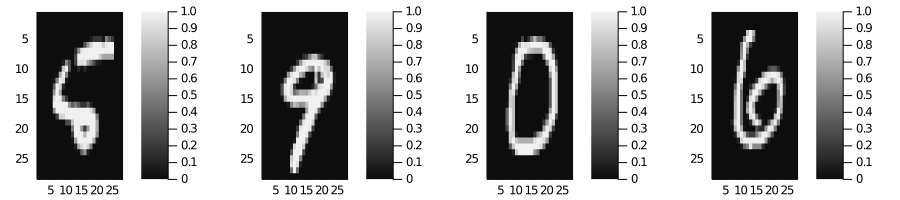

In [116]:
p1 = heatmap(transpose(test_x[:,:,9]), c =:grays)
p2 = heatmap(transpose(test_x[:,:,10]), c =:grays)
p3 = heatmap(transpose(test_x[:,:,11]), c =:grays)
p4 = heatmap(transpose(test_x[:,:,12]), c =:grays)

plot(p1, p2, p3, p4, layout = @layout([A B C D]), size = (900,200), c =:grays, yflip = true)

In [145]:
"""
Network structure. 

    sizes::Array{Int64, 1}
    weights_hidden::Array{Float64,2}
    weights_output::Array{Float64,2}
    biases_hidden::Array{Float64,1}
    biases_output::Array{Float64,1} 
"""
struct Network_struct1
    sizes::Array{Int64, 1} # size of each layer
    # randomised default values
    weights_hidden::Array{Float64,2}
    weights_output::Array{Float64,2}
    biases_hidden::Array{Float64,1} 
    biases_output::Array{Float64,1} 
end


"""
convert an int in (0-9) to Array{Float64,1} eg.

    4 -> [0,0,0,0,4,0,0,0,0,0]

Not used for matrix determinant example
"""
function binary_rep(target::Int64)
    rep = zeros(10)
    rep[target+1]=1.0
    return rep
end


"""
sigmoid function for each "neuron"
"""
function sigmoid(z::Float64)
    return 1/(1+exp(-z))
end


"""
evaluate output of a given network configuration. Arguments:

    self::Network_struct
    input_data::Array{Float64,1}
    target::Int64
"""
function evaluate(self::Network_struct1, input_data::Array{Normed{UInt8,8},1}, target::Int64)
    hidden_layer = []
    network_output = []
    #evaluate the hidden layer
    for i in 1:self.sizes[2]
        push!(hidden_layer, sigmoid(dot(self.weights_hidden[i,:],input_data)+self.biases_hidden[i]))
    end
    for i in 1:self.sizes[3]
        push!(network_output, sigmoid(dot(self.weights_output[i,:],hidden_layer)+self.biases_output[i]))
    end
    # pass forward to output layer
    return network_output # Usually you would divide by the number of input alues/target labels here and not the size of the output layer.
end 
"""
evaluate cost of a given output 
    self::Network_struct
    Array{Float64,1}::network_output
    Float64::target
"""
function cost(self::Network_struct1, network_output::Array{Any,1}, target::Int64)
    return (1/self.sizes[3]) * sum(abs2.(network_output .- binary_rep(target))) 
end

cost

In [156]:
using FixedPointNumbers
"""
Function to update weights and biases by gradient descent. Arguments:
    
    self::Network_struct
    learning_rate::Float64
    step_size::Float64
    parameter_space_size::Int64
    input_data::Array{Float64,1}
    tolerance::Float64
    target::Int64

"""
function train(self::Network_struct1, learning_rate::Float64, step_size::Float64, 
        parameter_space_size::Int64, input_data::Array{FixedPointNumbers.Normed{UInt8,8},1}
        , tolerance::Float64, target::Int64)
    
    network_output = evaluate(self, input_data, target)
    C_0 = cost(self, network_output, target)
    
    print("\n\ntraining...\n")
    flush(stdout)
    iter = 0
    while C_0 > tolerance && iter < 50
        network_output = evaluate(self, input_data, target)
        C_0 = cost(self, network_output, target)
        
        w2_0 = self.weights_hidden; w3_0 = self.weights_output
        b2_0 = self.biases_hidden; b3_0 = self.biases_output
        
        # arrays to hold gradients.
        gw2 = []; gw3 = []
        gb2 = []; gb3 = []
        
        for i in 1:length(self.weights_hidden)

            update_set = copy(w2_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, update_set, self.weights_output, 
                self.biases_hidden, self.biases_output)

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gw2, derivative)
            #self.weights_hidden[i] = self.weights_hidden[i] - learning_rate*derivative
            
        end
        
        for i in 1:length(self.biases_hidden)

            update_set = copy(b2_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, self.weights_output,
                update_set, self.biases_output )

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gb2, derivative)
            #self.biases_hidden[i] = self.biases_hidden[i] - learning_rate*derivative
        end
        
        for i in 1:length(self.weights_output)

            update_set = copy(w3_0)
            update_set[i] += step_size

            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, update_set,
                self.biases_hidden, self.biases_output )

            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gw3, derivative)
            #self.weights_output[i] = self.weights_output[i] - learning_rate*derivative
        end
        
        for i in 1:length(self.biases_output)
            update_set = copy(b3_0)
            update_set[i] += step_size
            updated_network = 
            Network_struct1(self.sizes, self.weights_hidden, self.weights_output,
                self.biases_hidden, update_set)
            
            updated_output = evaluate(updated_network, input_data, target)
            updated_eval = cost(updated_network, updated_output, target)
            
            derivative = (1.0/step_size)*(updated_eval-C_0)
            push!(gb3, derivative)
            #self.biases_output[i] = self.biases_output[i] - learning_rate*derivative
        end
        
        # Update the weights
        for (i, gi) in enumerate(gw2) self.weights_hidden[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gb2) self.biases_hidden[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gw3) self.weights_output[i] -= learning_rate*gi end
        for (i, gi) in enumerate(gb3) self.biases_output[i] -= learning_rate*gi end
        
        network_output = evaluate(self, input_data, target)
        @show C_0 = cost(self, network_output, target)
        flush(stdout)
        iter = iter + 1
    end
end

train

target = training_y[1] = 5


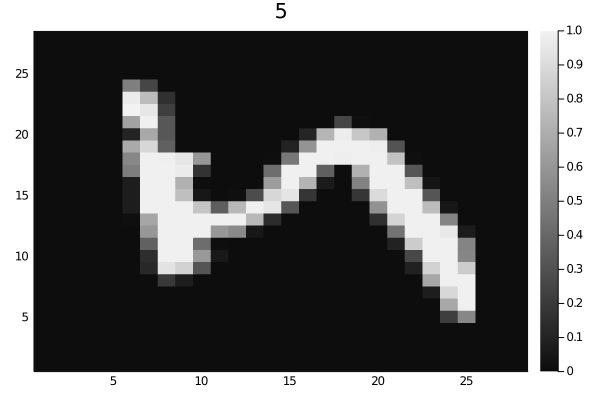

In [162]:
# random matrix to test network
mnist_data = transpose([training_x[:,:,10]])[1]
network_size = [length(mnist_data),15,10]

hidden_weight = rand(network_size[2]+network_size[3],network_size[1])
output_weight = rand(network_size[3], network_size[2])
hidden_biases = rand(network_size[2])
output_biases = rand(network_size[3])

network_mn = 
Network_struct1(network_size, hidden_weight, output_weight, hidden_biases, output_biases)

parameter_space_size =  length(network.weights_hidden)+
      length(network.weights_output)+
      length(network.biases_hidden)+
      length(network.biases_hidden)



true_res = []
estim_res = []
err = []

#for i in 1:250
# random matrix
mnist_data = transpose([training_x[:,:,1]])[1]
# target result
@show target = training_y[1]

heatmap(transpose(mnist_data),title = "$(target)", c =:grays)

In [165]:
learning_rate = 1.0; step_size = 0.000001; tolerance = 0.0001;
# train network on sample data
train(network_mn, learning_rate, step_size, parameter_space_size, 
    vcat(mnist_data...), tolerance, target)


print("\n \n true result =$(target)")
print("\n guess : $(evaluate(network_mn, vcat(mnist_data...), target))")
print("\nerror : $(evaluate(network_mn, vcat(mnist_data...), target)[1] - target)")
push!(true_res, target)
push!(estim_res, evaluate(network_mn, vcat(mnist_data...), target)[1])
push!(err, evaluate(network_mn, vcat(mnist_data...), target)[1] - target)
flush(stdout)
#end



training...
C_0 = cost(self, network_output, target) = 0.8994129676406502
C_0 = cost(self, network_output, target) = 0.8994122632510136
C_0 = cost(self, network_output, target) = 0.8994115569652879
C_0 = cost(self, network_output, target) = 0.8994108487735174
C_0 = cost(self, network_output, target) = 0.8994101386700136
C_0 = cost(self, network_output, target) = 0.8994094266446769
C_0 = cost(self, network_output, target) = 0.8994087126883262
C_0 = cost(self, network_output, target) = 0.8994079967938511
C_0 = cost(self, network_output, target) = 0.8994072789513736
C_0 = cost(self, network_output, target) = 0.8994065591530207
C_0 = cost(self, network_output, target) = 0.8994058373899563
C_0 = cost(self, network_output, target) = 0.8994051136528842
C_0 = cost(self, network_output, target) = 0.8994043879328203
C_0 = cost(self, network_output, target) = 0.8994036602209908
C_0 = cost(self, network_output, target) = 0.8994029305082583
C_0 = cost(self, network_output, target) = 0.89940219878